In [12]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split #helps split data evenly and randomly
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn import preprocessing 
sb.set()

pd.options.display.max_rows = 999



In [13]:
lifeEx = pd.read_csv("dataset/life_filled.csv")
print("Data dimensions", lifeEx.shape)
lifeEx.head(n = 2938)

Data dimensions (2938, 22)


,Unnamed: 0,COUNTRY,STATUS,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,...,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
0,0,Afghanistan,Developing,2015.0,65.0,26.3,6.2,0.01,71.279624,65.0,...,8.3,6.0,8.16,65.0,0.01,584.259210,33736494.0,34.5,0.479,10.1
1,1,Afghanistan,Developing,2014.0,59.9,27.1,6.4,0.01,73.523582,62.0,...,8.6,58.0,8.18,62.0,0.01,612.696514,327582.0,35.0,0.476,10.0
2,2,Afghanistan,Developing,2013.0,59.9,26.8,6.6,0.01,73.219243,64.0,...,8.9,62.0,8.13,64.0,0.01,631.744976,31731688.0,35.4,0.470,9.9
3,3,Afghanistan,Developing,2012.0,59.5,27.2,6.9,0.01,78.184215,67.0,...,9.3,67.0,8.52,67.0,0.01,669.959000,3696958.0,35.9,0.463,9.8
4,4,Afghanistan,Developing,2011.0,59.2,27.5,7.1,0.01,7.097109,68.0,...,9.7,68.0,7.87,68.0,0.01,63.537231,2978599.0,36.4,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2933,Zimbabwe,Developing,2004.0,44.3,72.3,2.7,4.36,5777.501385,68.0,...,4.2,67.0,7.13,65.0,3.36,454.366654,12777511.0,18.8,0.407,9.2
2934,2934,Zimbabwe,Developing,2003.0,44.5,71.5,2.6,4.06,5488.384035,7.0,...,4.1,7.0,6.52,68.0,3.67,453.351155,12633897.0,19.7,0.418,9.5
2935,2935,Zimbabwe,Developing,2002.0,44.8,7.3,2.5,4.43,0.000000,73.0,...,4.0,73.0,6.53,71.0,3.98,57.348340,125525.0,2.5,0.427,10.0
2936,2936,Zimbabwe,Developing,2001.0,45.3,68.6,2.5,1.72,0.000000,76.0,...,3.9,76.0,6.16,75.0,4.21,548.587312,12366165.0,3.3,0.427,9.8


In [14]:
predictors = pd.DataFrame(lifeEx)

In [15]:
lifeEx.dtypes


Unnamed: 0                           int64
COUNTRY                             object
STATUS                              object
YEAR                               float64
LIFE_EXPECTANCY                    float64
ADULT_MORTALITY                    float64
INFANT_DEATHS                      float64
ALCOHOL                            float64
PERCENTAGE_EXPENDITURE             float64
HEPATITIS_B                        float64
MEASLES                            float64
BMI                                float64
UNDER_FIVE_DEATHS                  float64
POLIO                              float64
TOTAL_EXPENDITURE                  float64
DIPHTHERIA                         float64
HIV/AIDS                           float64
GDP                                float64
POPULATION                         float64
THINNESS_5_to_19_YEARS             float64
INCOME_COMPOSITION_OF_RESOURCES    float64
SCHOOLING                          float64
dtype: object

In [16]:
lifeEx = lifeEx.drop(['Unnamed: 0'],axis=1)
lifeEx = lifeEx.drop(['COUNTRY'],axis=1)
lifeEx = lifeEx.drop(['STATUS'],axis=1)

lifeEx.describe()


,YEAR,LIFE_EXPECTANCY,ADULT_MORTALITY,INFANT_DEATHS,ALCOHOL,PERCENTAGE_EXPENDITURE,HEPATITIS_B,MEASLES,BMI,UNDER_FIVE_DEATHS,POLIO,TOTAL_EXPENDITURE,DIPHTHERIA,HIV/AIDS,GDP,POPULATION,THINNESS_5_to_19_YEARS,INCOME_COMPOSITION_OF_RESOURCES,SCHOOLING
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.240764,16.531808,12.636635,5.925333,3333.452964,75.170445,241.959224,38.790629,16.486052,82.339751,6.981586,82.115991,0.174210,20742.765497,6.347477e+07,9.939140,0.629447,12.340658
std,4.613841,9.538927,12.447696,18.186081,6.543692,5461.761692,25.786149,1146.727249,20.485912,24.106069,23.503008,4.460736,23.785436,0.507778,34611.802858,1.282816e+08,9.026404,0.206221,3.649192
min,2000.000000,36.300000,0.100000,0.000000,0.010000,0.000000,0.000000,0.000000,1.000000,0.100000,3.000000,0.370000,2.000000,0.010000,1.681350,0.000000e+00,0.200000,0.000000,0.000000
25%,2004.000000,63.125000,7.400000,0.400000,1.082500,50.549554,56.000000,0.000000,19.400000,0.400000,77.000000,4.370000,78.000000,0.010000,580.486996,2.893995e+05,3.200000,0.502000,10.300000
50%,2008.000000,72.100000,14.400000,2.800000,4.155000,322.177866,87.000000,1.700000,43.900000,3.400000,93.000000,5.950000,93.000000,0.010000,3116.561755,2.872581e+06,6.900000,0.676000,12.500000
75%,2012.000000,75.700000,22.800000,29.255802,8.740000,4608.350477,96.000000,36.025000,56.400000,38.261467,97.000000,8.190000,97.000000,0.080000,19482.273660,3.192534e+07,14.500000,0.775000,14.600000
max,2015.000000,91.933283,72.300000,180.000000,39.570853,22283.707841,99.000000,21218.300000,116.135422,250.000000,99.000000,30.745757,99.000000,5.060000,152400.152926,1.293859e+09,56.300000,0.948000,26.135726


In [17]:
lifeEx.dtypes


YEAR                               float64
LIFE_EXPECTANCY                    float64
ADULT_MORTALITY                    float64
INFANT_DEATHS                      float64
ALCOHOL                            float64
PERCENTAGE_EXPENDITURE             float64
HEPATITIS_B                        float64
MEASLES                            float64
BMI                                float64
UNDER_FIVE_DEATHS                  float64
POLIO                              float64
TOTAL_EXPENDITURE                  float64
DIPHTHERIA                         float64
HIV/AIDS                           float64
GDP                                float64
POPULATION                         float64
THINNESS_5_to_19_YEARS             float64
INCOME_COMPOSITION_OF_RESOURCES    float64
SCHOOLING                          float64
dtype: object

In [18]:
##BUILD A Heatmap

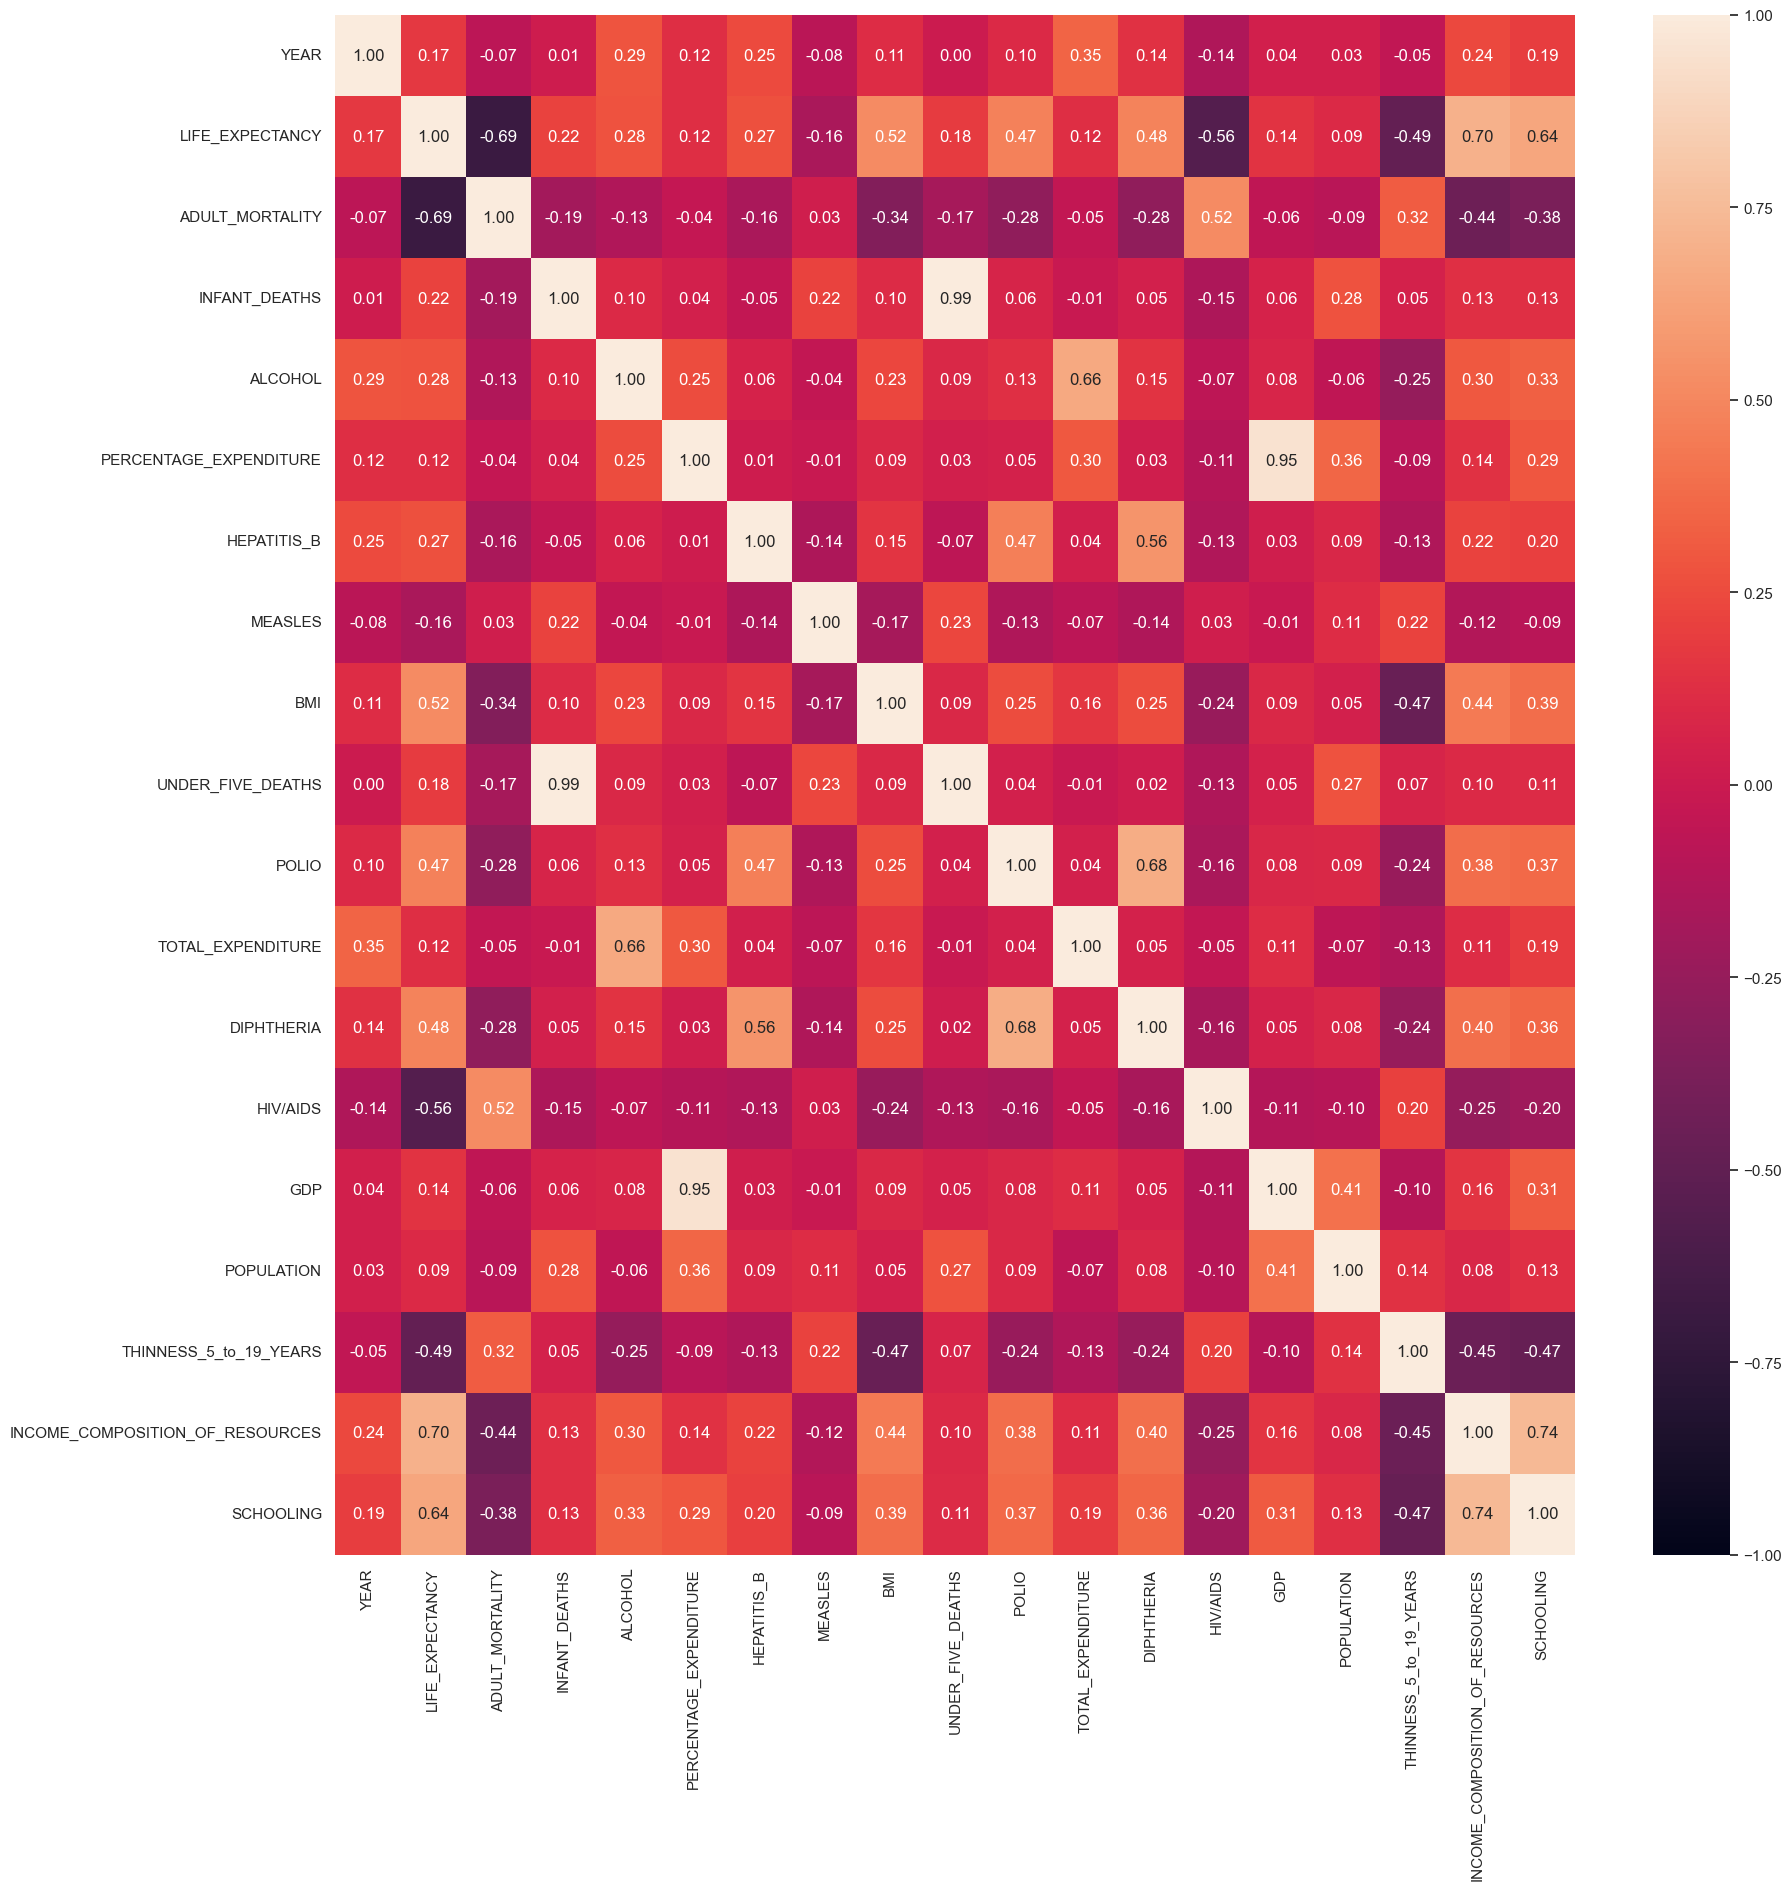

In [19]:
f = plt.figure(figsize=(20, 20))
sb.heatmap(lifeEx.corr(), vmin = -1, vmax = 1, annot = True, fmt = ".2f")
plt.show()

Text(0.5, 1.0, 'Features Correlating with Life Expectancy')

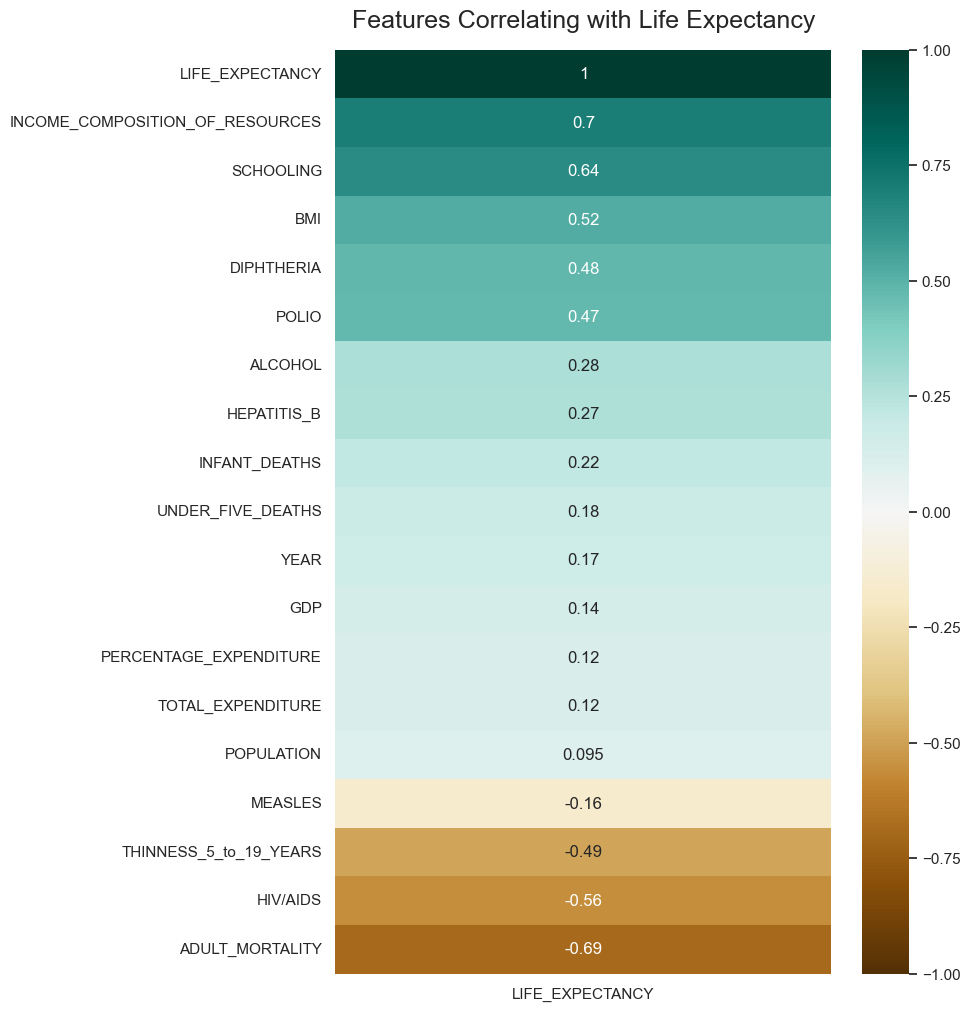

In [20]:
f=plt.figure(figsize=(8, 12))
heatmap = sb.heatmap(lifeEx.corr()[['LIFE_EXPECTANCY']].sort_values(by='LIFE_EXPECTANCY', ascending=False)
, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Life Expectancy', fontdict={'fontsize':18}, pad=16)

KeyError: 0

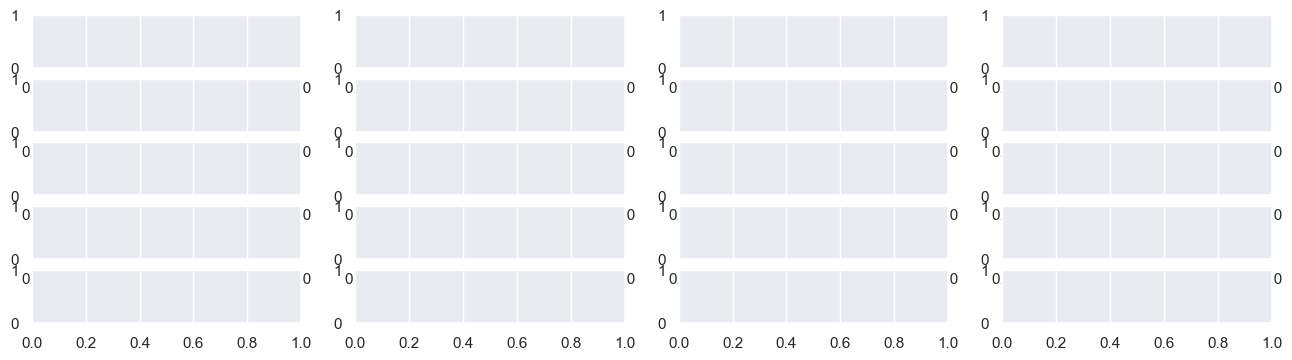

In [21]:

numplot = len(lifeEx.columns[1:])
numrows = (numplot+3)//4
f, axes = plt.subplots(nrows= numrows, ncols = 4, figsize = (16,4))
count = 0
for i, column in enumerate(lifeEx.columns[1:]):
    #plt.subplots(4, 4)
    row = i/4
    col = 1 % 4
    plt.scatter(lifeEx['LIFE_EXPECTANCY'], lifeEx[i], ax = axes[row][col] )
    plt.ylabel('Life expectancy', size = 15, ax = axes[row][col] )
    plt.xlabel(i, size = 15, ax = axes[row][col] )
    plt.show()


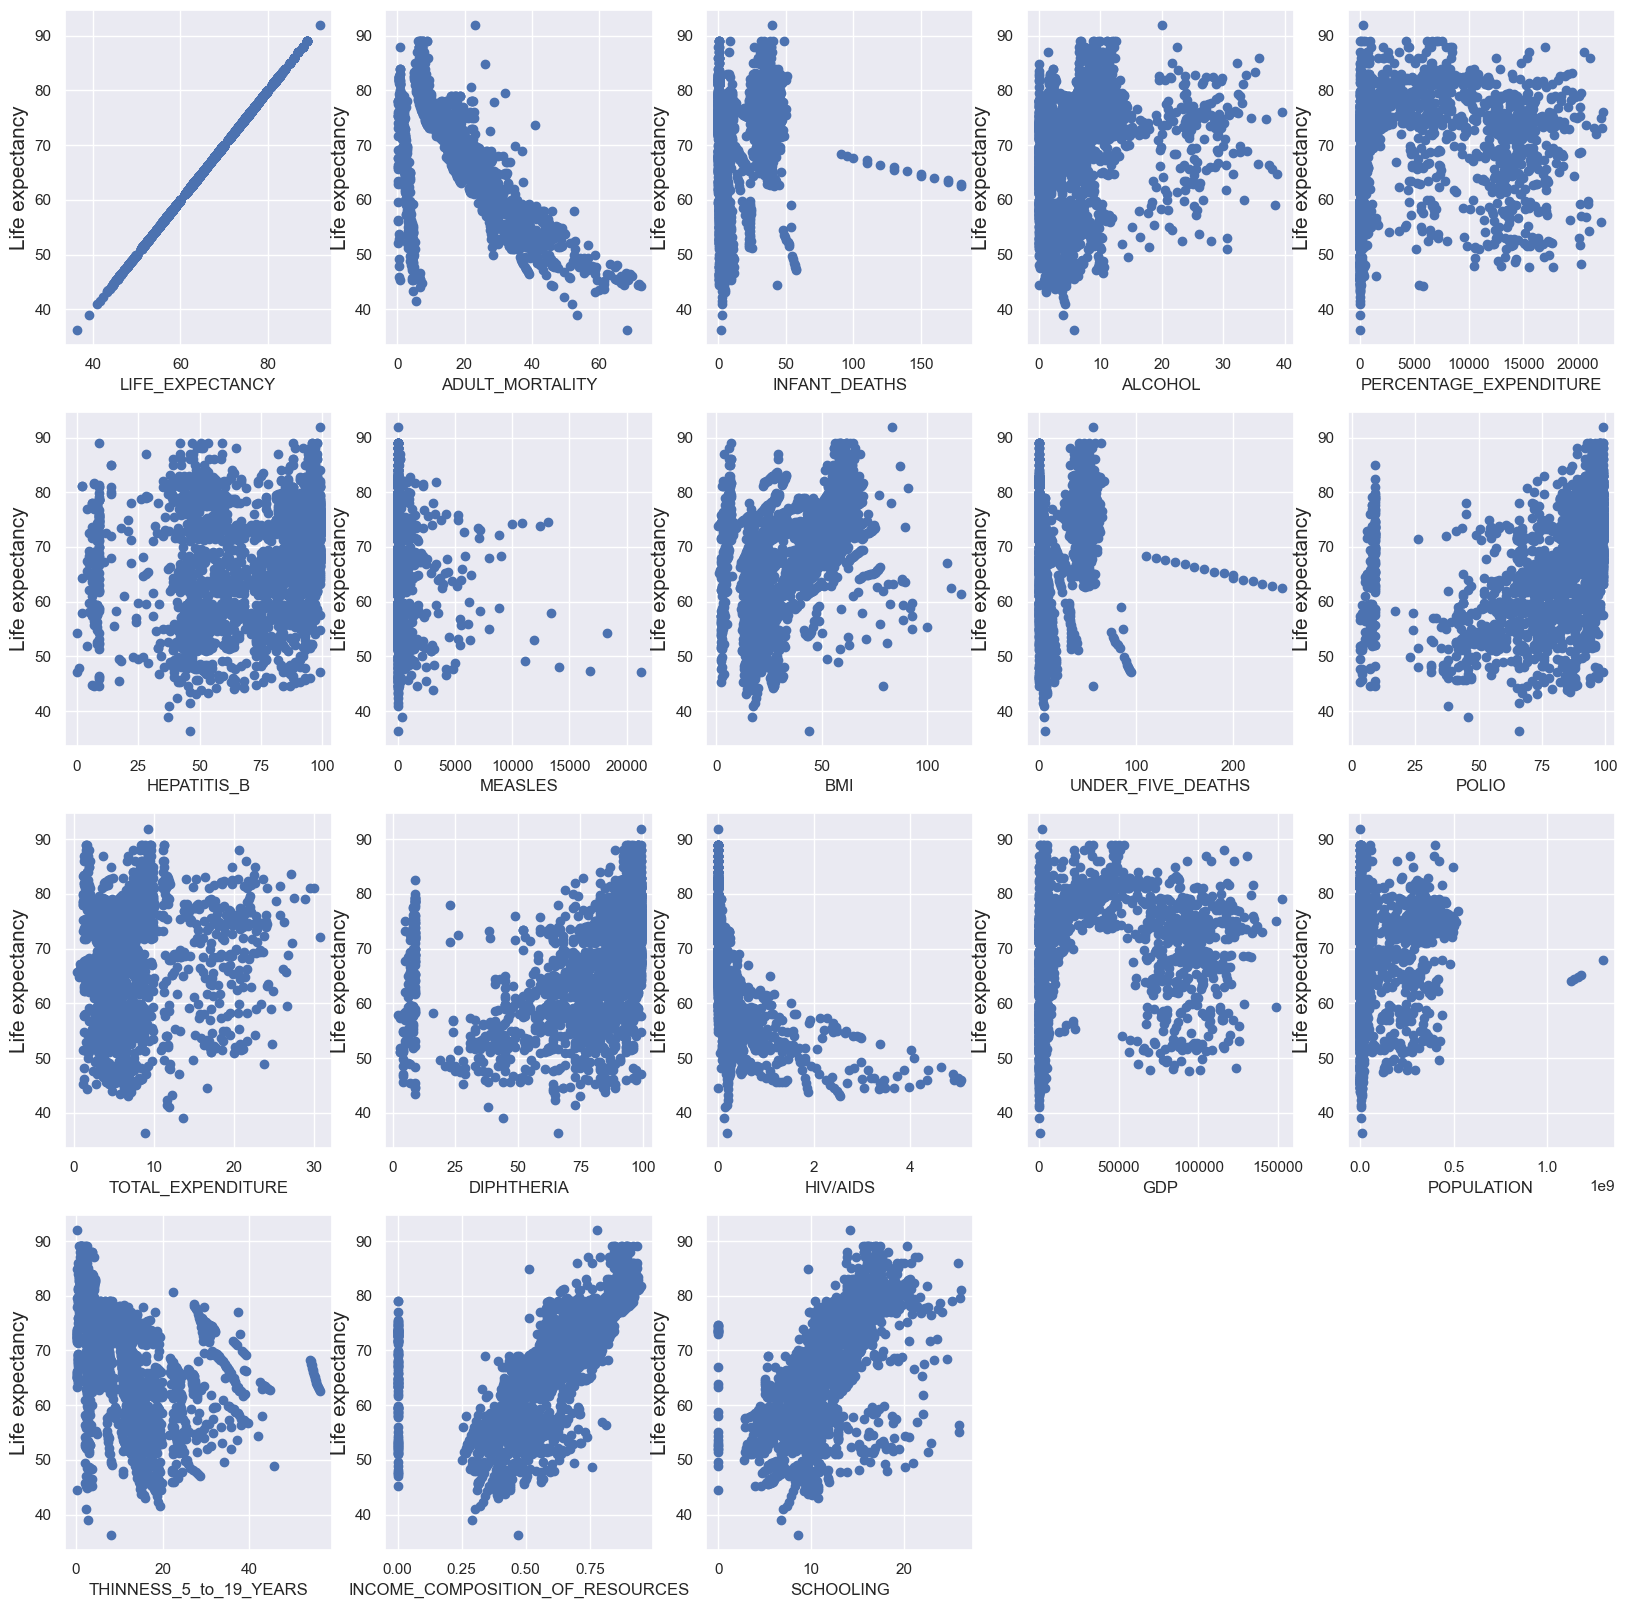

In [25]:
plt.figure(figsize=(20,20),dpi=100)

for index, var in enumerate(lifeEx.columns[1:]):
    plt.subplot(4,5, index+1)
    plt.scatter(lifeEx[var],lifeEx['LIFE_EXPECTANCY'])
    plt.ylabel('Life expectancy',size=15)
    plt.xlabel(var,size=12)

In [26]:
predictors = pd.DataFrame(lifeEx[["SCHOOLING", "LIFE_EXPECTANCY"]])
predictors

,SCHOOLING,LIFE_EXPECTANCY
0,10.1,65.0
1,10.0,59.9
2,9.9,59.9
3,9.8,59.5
4,9.5,59.2
...,...,...
2933,9.2,44.3
2934,9.5,44.5
2935,10.0,44.8
2936,9.8,45.3


In [27]:
predictors.corr()

,SCHOOLING,LIFE_EXPECTANCY
SCHOOLING,1.000000,0.642381
LIFE_EXPECTANCY,0.642381,1.000000


In [28]:
schooling = pd.DataFrame(lifeEx["SCHOOLING"])
lifeExpectancy = pd.DataFrame(lifeEx["LIFE_EXPECTANCY"])

In [29]:
2938*0.2

587.6

In [30]:
2938-588

2350

In [31]:
#Train Set : 2350 samples
schoolingTrain = pd.DataFrame(schooling[:2350])
lifeExTrain = pd.DataFrame(lifeExpectancy[:2350])

# Test Set: 588 Samples
schoolingTest = pd.DataFrame(schooling[-588:])
lifeExTest = pd.DataFrame(lifeExpectancy[-588:]) 

print("Train Set :", schoolingTrain.shape, lifeExTrain.shape)
print("Test Set :", schoolingTest.shape, lifeExTest.shape)

Train Set : (2350, 1) (2350, 1)
Test Set : (588, 1) (588, 1)


In [32]:
schoolingTrain.info

<bound method DataFrame.info of       SCHOOLING
0          10.1
1          10.0
2           9.9
3           9.8
4           9.5
...         ...
2345       17.3
2346       17.6
2347       16.8
2348       16.8
2349       17.0

[2350 rows x 1 columns]>

In [33]:
schoolingTrain.describe()

,SCHOOLING
count,2350.000000
mean,12.315014
std,3.622899
min,0.000000
25%,10.100000
50%,12.600000
75%,14.700000
max,25.911665


In [34]:
lifeExTrain.describe()

,LIFE_EXPECTANCY
count,2350.000000
mean,69.525138
std,9.458528
min,36.300000
25%,63.500000
50%,72.350000
75%,76.000000
max,91.933283


<AxesSubplot:>

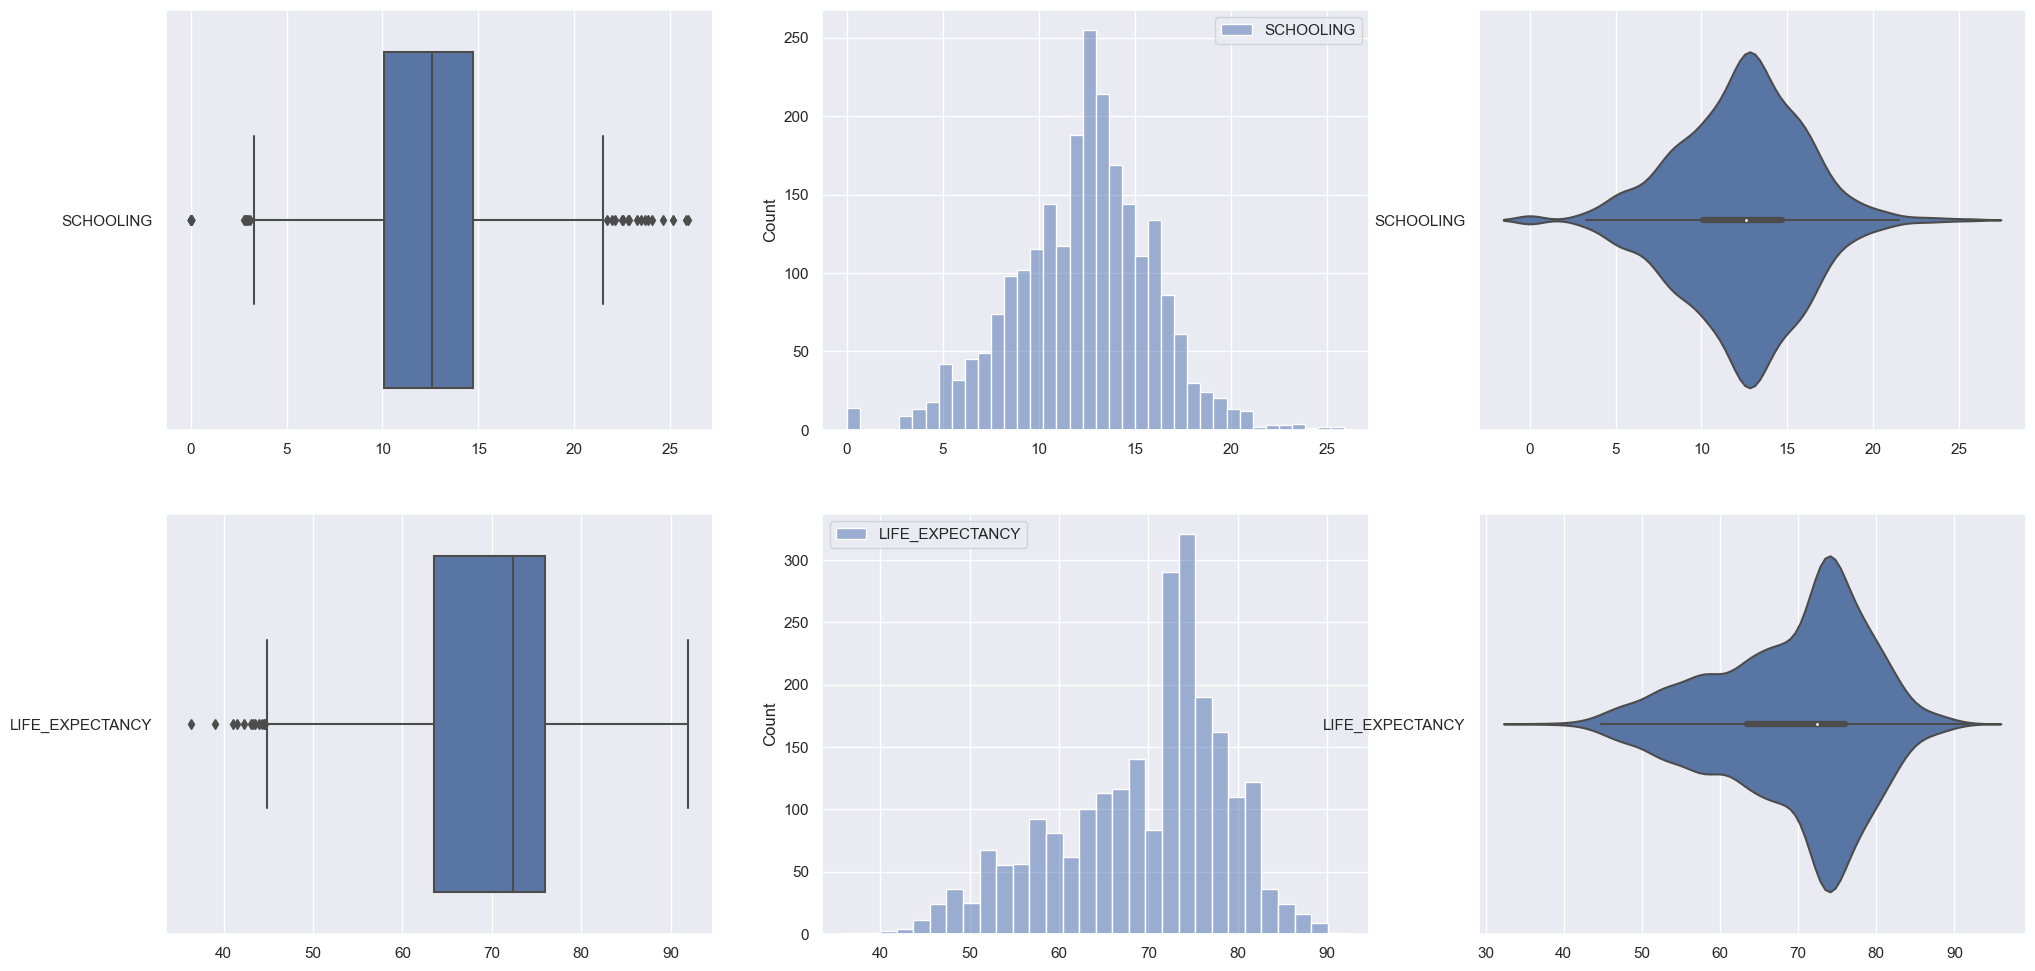

In [35]:
f,axes = plt.subplots(2, 3, figsize = (24,12))

# Plot the basic uni-varitae figures for garageArea Train data
sb.boxplot (data = schoolingTrain, orient = 'h', ax = axes[0,0])
sb.histplot (data = schoolingTrain, ax = axes [0,1])
sb.violinplot (data = schoolingTrain, orient = 'h', ax = axes [0,2])

# Plot the basic uni-variate figures for salePrice Train Data
sb.boxplot (data = lifeExTrain, orient = 'h', ax = axes[1,0])
sb.histplot (data = lifeExTrain, ax = axes[1,1])
sb.violinplot (data = lifeExTrain, orient = 'h',ax = axes[1,2])

In [36]:
trainDF = pd.concat([schoolingTrain, lifeExTrain], axis = 1)
trainDF

,SCHOOLING,LIFE_EXPECTANCY
0,10.1,65.0
1,10.0,59.9
2,9.9,59.9
3,9.8,59.5
4,9.5,59.2
...,...,...
2345,17.3,88.0
2346,17.6,87.0
2347,16.8,85.0
2348,16.8,82.0


In [47]:
trainDF.corr()

,SCHOOLING,LIFE_EXPECTANCY
SCHOOLING,1.00000,0.68874
LIFE_EXPECTANCY,0.68874,1.00000


<AxesSubplot:>

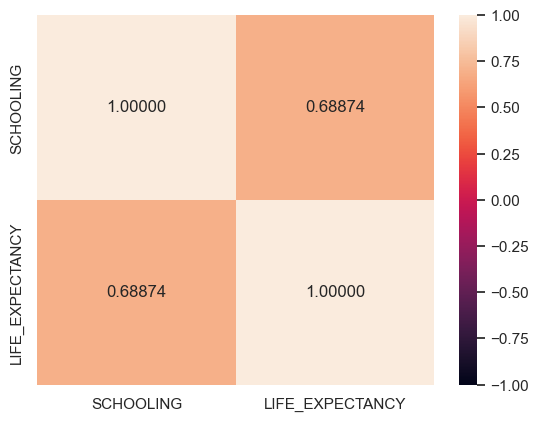

In [64]:
sb.heatmap(trainDF.corr(), vmin = -1, vmax = 1, robust = True, annot = True, fmt = ".5f", square = False)
#sb.heatmap(trainDF.corr(), annot = True, fmt = ".5f", linecolor = 'red')

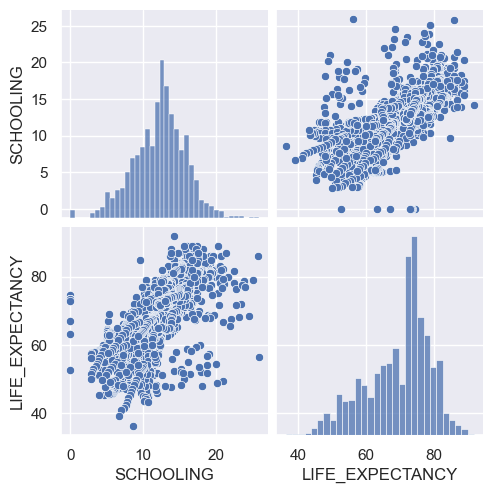

In [41]:
sb.pairplot(data = trainDF)

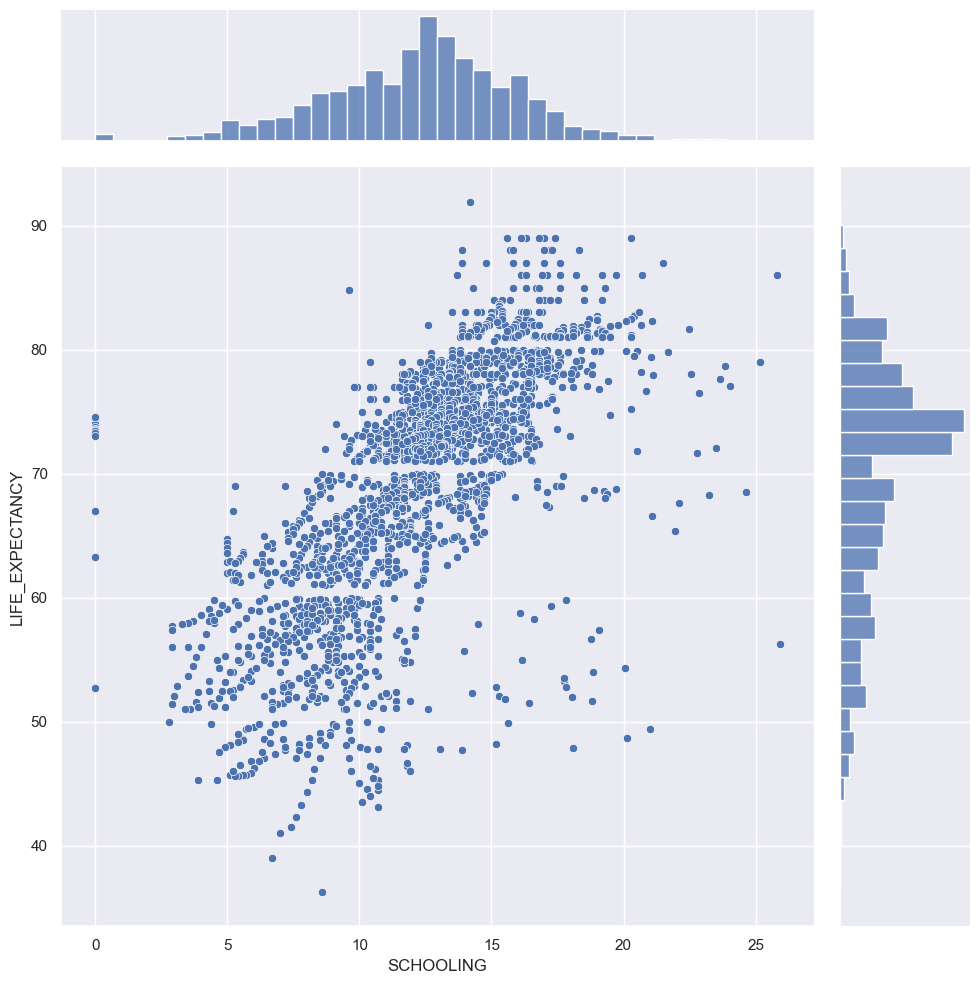

In [42]:
sb.jointplot(data=trainDF, x = 'SCHOOLING', y = 'LIFE_EXPECTANCY', height=10)

In [43]:
linreg=LinearRegression()
linreg.fit(schoolingTrain, lifeExTrain)

LinearRegression()

In [44]:
SOMETHING

NameError: name 'SOMETHING' is not defined

In [45]:
print('Intercept \t: b = ', linreg.intercept_)
print('Coefficiencts \t: a=', linreg.coef_)


Intercept 	: b =  [47.38108035]
Coefficiencts 	: a= [[1.79813496]]


In [46]:
salePrice_

NameError: name 'salePrice_' is not defined

#Doing some logistic regression to see the relation of a developing country and their .. 
# maybe I also do the multi output regression haha idk which param yet but we'll see

